## import required functionality for this chapter

In [2]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing\
import matplotlib.pylab as plt

## code for opening the Boston Housing file and viewing the first 9 records

In [53]:
housing_df = pd.read_csv("BostonHousing.csv")
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [54]:
# rename CAT. MEDV column for easier data handling

housing_df = housing_df.rename(columns = {'CAT. MEDV':'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [34]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


## code for creating Figure 3.1

In [11]:
## Load the Amtrak data and convert them to be suitable for time series analysis

Amtrak_df = pd.read_csv('Amtrak.csv', squeeze = True)
Amtrak_df.head()
# Ridership : the number of passengers on a public transport system

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [12]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format = '%d/%m/%Y')
Amtrak_df.head()

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01


In [15]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index = Amtrak_df.Date)
ridership_ts.head()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
dtype: float64

In [16]:
## Boston housing data

housing_df = pd.read_csv("BostonHousing.csv")
housing_df = housing_df.rename(columns = {'CAT. MEDV' : 'CAT_MEDV'})

**pandas version**

Text(0, 0.5, 'Ridership (in 000s)')

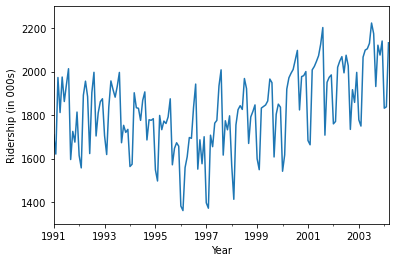

In [19]:
## Line graph

ridership_ts.plot(ylim = [1300, 2300], legend = False)
plt.xlabel('Year') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-axis label

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

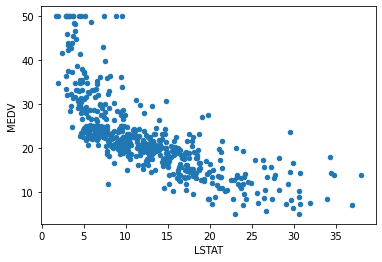

In [20]:
## scatter plot with axes names

housing_df.plot.scatter(x = 'LSTAT', y = 'MEDV', legend = False)

Text(0, 0.5, 'Avg. MEDV')

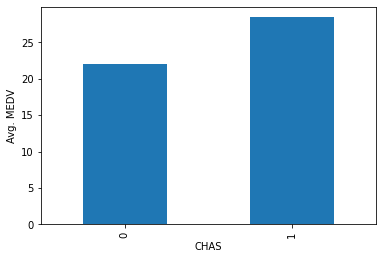

In [22]:
## barchart of CHAS vs mean MEDV
# compute mean MEDV per CHAS = (0,1)

ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind = 'bar')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, '% of CAT.MEDV')

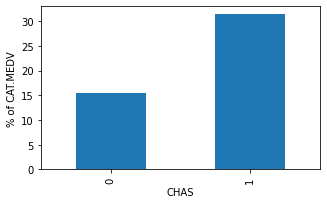

In [28]:
## barchart of CHAS vs. CAT_MEDV

dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV']*100
ax = dataForPlot.plot(kind = 'bar', figsize=[5, 3])
ax.set_ylabel('% of CAT.MEDV')

In [35]:
# groupby().mean()

housing_df.groupby('CHAS').mean()
# CHAS의 범주에 따라서 평균을 냄. CAT_MEDV는 각 범주가 0, 1로 되어있기 때문에 비율이 됨(=상대도수) 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


**matplotlib version**

matplotlib 이해하기 : https://wikidocs.net/14604, https://engineer-mole.tistory.com/218

Text(0, 0.5, 'Ridership (in 000s)')

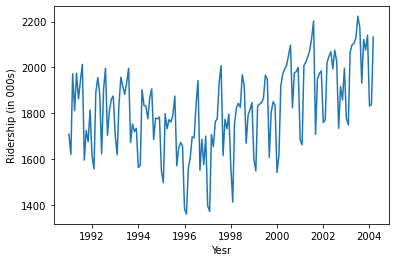

In [38]:
## line graph

plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Yesr') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-azis label

Text(0, 0.5, 'MEDV')

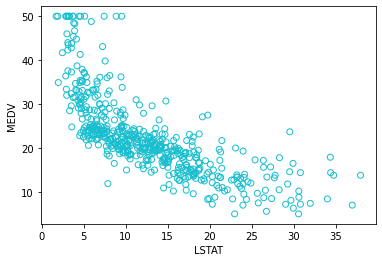

In [47]:
## Set the color of the points in the scatterplot and draw as open circles.

plt.scatter(housing_df.LSTAT, housing_df.MEDV, color = 'C9', facecolor='none')
# color : 산점도 point 색깔, facecolor : 배경색
plt.xlabel('LSTAT'); plt.ylabel('MEDV')

Text(0, 0.5, 'Avg. MEDV')

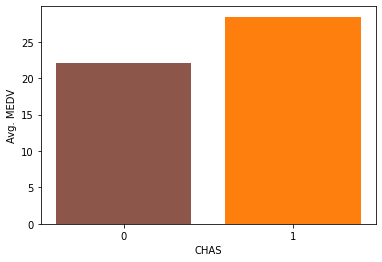

In [57]:
## barchart of CHAS vs mean MEDV
# compute mean MEDV per CHAS = (0,1)

dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots() # subplots() -> figure(캔버스 전체)와 axes(그 내부의 좌표축)를 return / 위의 사이트 참고
ax.bar(dataForPlot.index, dataForPlot, color = ['C5','C1'])
ax.set_xticks([0,1]) # 눈금 설정 함수
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, '% of CAT.MEDV')

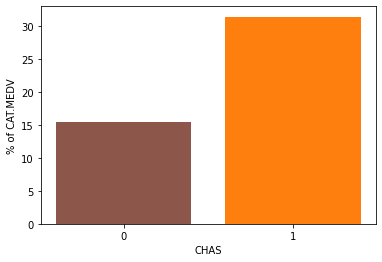

In [58]:
## barchart of CHAS vs CAT.MEDV

dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV']*100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5','C1'])
ax.set_xticks([0,1])
ax.set_xlabel('CHAS'); ax.set_ylabel('% of CAT.MEDV')

## code for creating Figure 3.2

Text(0, 0.5, 'count')

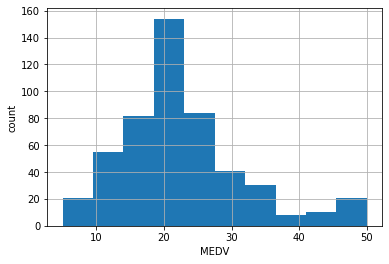

In [59]:
## histogram of MEDV

ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')

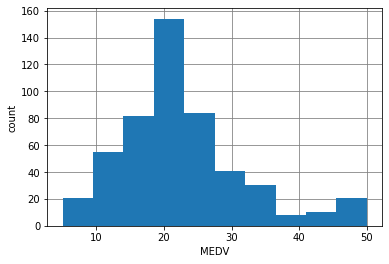

In [64]:
# alternative plot with matplotlib

fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
#show the grid lined behind the histogram
ax.set_axisbelow(True) # axis(grid)를 plot 뒤로 가게 해줌
ax.grid(which = 'major', color = 'grey', linestyle = '-')
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.show()

AttributeError: module 'matplotlib.pylab' has no attribute 'subtitle'

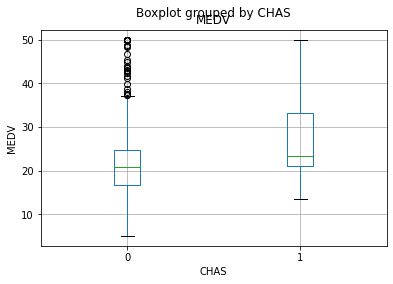

In [67]:
## boxplot of MEDV for different values for CHAS

ax = housing_df.boxplot(column = 'MEDV', by = 'CHAS')
ax.set_ylabel('MEDV')
plt.subtitle('') # Suppress(막다) the titles
plt.title('')
plt.show()

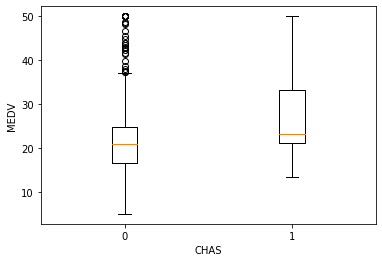

In [75]:
# alternative plot with matplotlib

dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
# list형식으로 각 boxplot 요소입력
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1,2]) # 눈금 설정하기
ax.set_xticklabels([0,1]) # 눈금 이름 설정하기
ax.set_xlabel('CHAS'); ax.set_ylabel('MEDV')
plt.show()

## code for creating Figure 3.3

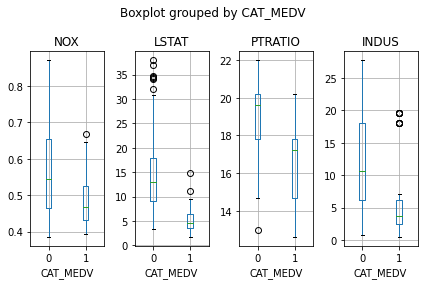

In [79]:
## side-by-side boxplots

fig, axes = plt.subplots(nrows=1, ncols=4) # 1행 4열로 캔버스를 나눔
housing_df.boxplot(column = 'NOX', by = 'CAT_MEDV', ax=axes[0]) # 0th canvas
housing_df.boxplot(column = 'LSTAT', by='CAT_MEDV',ax=axes[1]) # 1st canvas
housing_df.boxplot(column = 'PTRATIO',by='CAT_MEDV', ax=axes[2]) # 2nd
housing_df.boxplot(column = 'INDUS',by='CAT_MEDV',ax=axes[3]) # 3rd
for ax in axes:
    ax.set_xlabel('CAT_MEDV')
plt.tight_layout() # Increase the separation between the plots

## code for creating Figure 3.4

<AxesSubplot:>

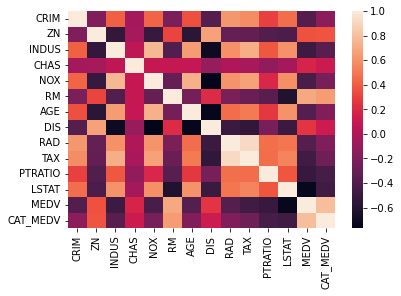

In [82]:
## simple heatmap of correlations (without values)

corr = housing_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

<AxesSubplot:>

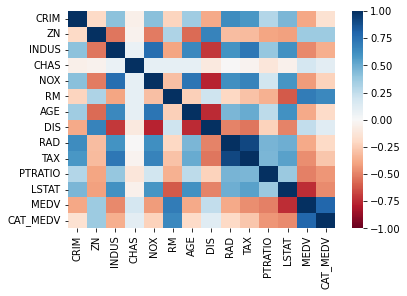

In [85]:
# change the colormap to a divergent(다른) scale and fix the range of the colormap

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='RdBu')

<AxesSubplot:>

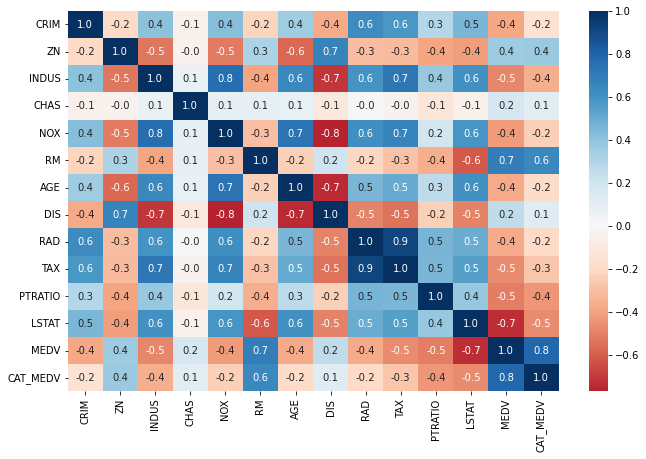

In [92]:
# Include information about values (example demonstrate how to control the size of the plot)

fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap='RdBu',center=0, ax=ax)
# annot=True : 각 셀에 상관계수를 입력 / fmt='.1f' 는 소수점 한자리까지의 float 형태로 입력하라는 뜻
# center = 0 : 상관계수 0을 히트맵 색의 중심으로 두고 그린다.

## code for generating a heatmap of missing values similar to Figure 3.5

In [20]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE']) # DATE를 기준으로 순차적으로 나열
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
376,01/01/2014,16:16,MANHATTAN,10030.0,40.817846,-73.941844,"(40.8178464, -73.9418441)",7 AVENUE,WEST 139 STREET,NaN,...,NaN,NaN,NaN,NaN,67960,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
69,01/01/2018,11:00,BRONX,10458.0,40.861700,-73.891390,"(40.8617, -73.89139)",WEBSTER AVENUE,EAST FORDHAM ROAD,NaN,...,NaN,NaN,NaN,NaN,3821610,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
510,01/02/2013,12:07,STATEN ISLAND,10314.0,40.580618,-74.152529,"(40.5806177, -74.1525287)",FOREST HILL ROAD,RICHMOND HILL ROAD,NaN,...,Unspecified,NaN,NaN,NaN,295943,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
944,01/03/2014,19:30,STATEN ISLAND,10306.0,40.573786,-74.106423,"(40.5737857, -74.1064233)",HYLAN BOULEVARD,BRYANT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,300599,AMBULANCE,UNKNOWN,NaN,NaN,NaN
444,01/03/2017,11:44,NaN,NaN,40.721140,-73.942825,"(40.72114, -73.942825)",NORTH HENRY STREET,MEEKER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3591243,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN


In [23]:
df.shape #1000행 29열

(1000, 29)

In [42]:
# given a dataframe, df create a copy of the array that is 0 if a field contains a value and 1 for NaN

naInfo = np.zeros(df.shape) # 값이 있는 값은 0로
naInfo[df.isna().values] = 1 # NaN가 있는 값은 1로
naInfo = pd.DataFrame(naInfo, columns = df.columns)
naInfo.head() 

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


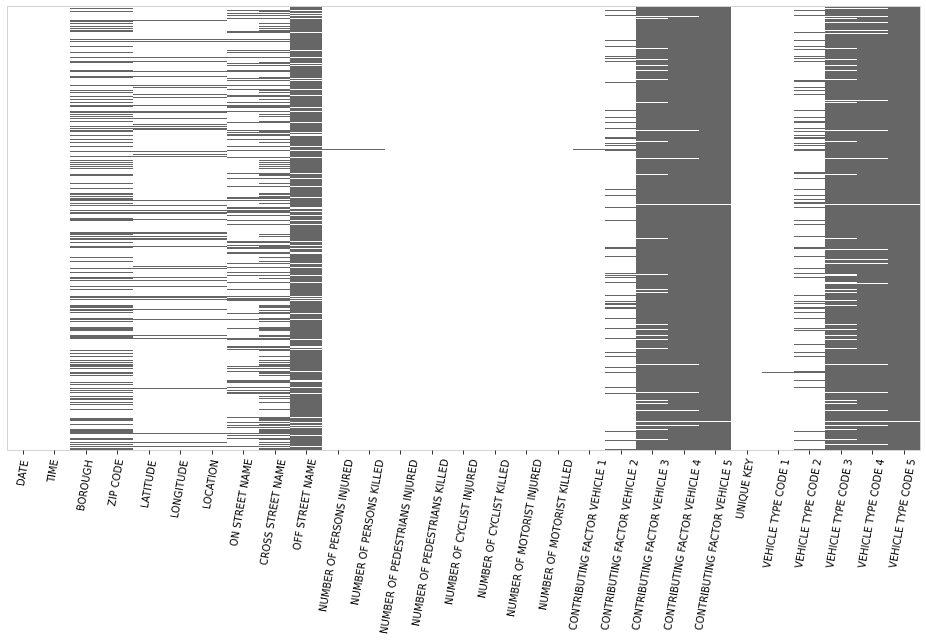

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(13,9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=['white','#666666'],cbar=False, ax=ax)
# cbar=False : 옆에 0~1까지의 색깔 표시하는거 없애기
ax.set_yticks([])

# draw frame around figure
rect = plt.Rectangle((0,0), naInfo.shape[1], naInfo.shape[0], linewidth=1, edgecolor='lightgrey',facecolor='None')
# plt.Rectangle(좌표, 너비, 높이, 선두께, 선색깔, 내부색깔)
rect = ax.add_patch(rect) # ax(axes)에 rect(도형) 추가
rect.set_clip_on(False) # When False, artists will be visible out side of the axes 
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

## code for creating Figure 3.6

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

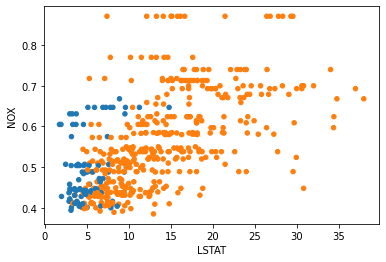

In [55]:
# Color the points by the value of CAT.MEDV

housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c==1 else 'C1' for c in housing_df.CAT_MEDV])

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

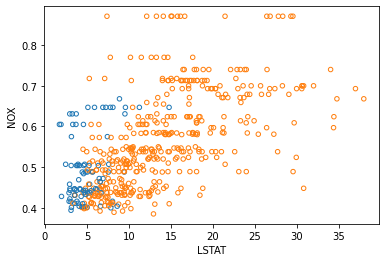

In [59]:
# Change the randering of the points to open circles by setting color to 'none'.

housing_df.plot.scatter(x='LSTAT', y='NOX', color = 'none', edgecolor=['C0' if c==1 else 'C1' for c in housing_df.CAT_MEDV])

If the data points for CAT_MEDV of 1 should be emphasized, it's useful to draw them separately.

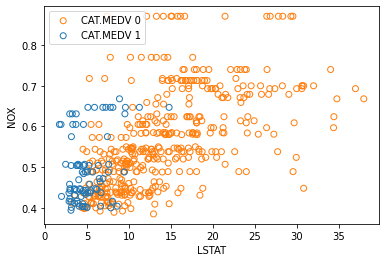

In [72]:
_, ax = plt.subplots()

for (catValue, color) in (0,'C1'), (1,'C0'): # catValue = 0, 1 / color = 'C1', 'C0'
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='None', edgecolor=color) # 첫 회 : 주황색 찍힘, 두 회 : 파란색이 찍힘
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(['CAT.MEDV 0', 'CAT.MEDV 1'])
plt.show() 

In [118]:
## panel plots
# compute mean MEDV per RAD and CHAS

dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
dataForPlot_df

CHAS  RAD
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      3      27.950000
      4      25.812500
      5      27.463636
      8      26.000000
      24     31.362500
Name: MEDV, dtype: float64

In [120]:
# We determine all possible RAD values to use as ticks

ticks = set(housing_df.RAD)
for i in range(2): # CHAS = 0, 1
    for t in ticks.difference(dataForPlot_df[i].index): # 차집합 : mean값이 없는 것 (CHAS ==1 이고 RAD==2,6,7인 값이 없는 것)
        dataForPlot_df.loc[(i,t)] = 0 # 해당 차집합인(값이 없는)위치에 0을 넣어서 채움
dataForPlot_df

CHAS  RAD
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      3      27.950000
      4      25.812500
      5      27.463636
      8      26.000000
      24     31.362500
      2       0.000000
      6       0.000000
      7       0.000000
Name: MEDV, dtype: float64

In [119]:
# 위에 for문 이해

ticks = set(housing_df.RAD)
print(ticks)
print(dataForPlot_df[1].index)
print(ticks.difference(dataForPlot_df[1].index)) # dataForPlot_df[i]의 인덱스와 ticks의 차집합

{1, 2, 3, 4, 5, 6, 7, 8, 24}
Int64Index([1, 3, 4, 5, 8, 24], dtype='int64', name='RAD')
{2, 6, 7}


In [121]:
# reorder to rows, so that the index is sorted

dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]
dataForPlot_df

CHAS  RAD
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      2       0.000000
      3      27.950000
      4      25.812500
      5      27.463636
      6       0.000000
      7       0.000000
      8      26.000000
      24     31.362500
Name: MEDV, dtype: float64

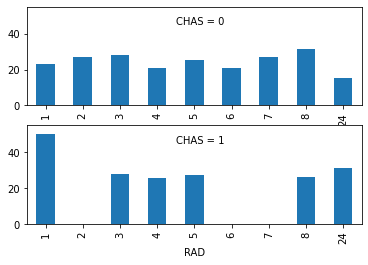

In [125]:
# Determine a common range for the y axis

yRange = [0, max(dataForPlot_df) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45)) # 해당 xy위치에 주석 쓰기
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
plt.show()

## code for creating Figure 3.7

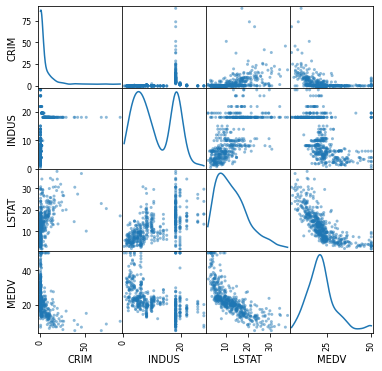

In [137]:
# Display scatterplots between the different variables
# The diagonal shows the distribution for each variables

df = housing_df[['CRIM','INDUS','LSTAT','MEDV']]
axes = scatter_matrix(df, alpha = 0.5, figsize = (6,6), diagonal='kde')
# scatter_matrix(dataframe, 투명도, 캔버스사이즈, 대각선 plot 종류) / diagonal='kde' : 대각선에 각 단일변수의 빈도분포도를 넣음

In [ ]:
corr = df.corr().values

In [142]:
plt.np.triu_indices_from(axes, k=1) # 0행 ~ 1,2,3열 / 1행 ~ 2,3열 / 2행 ~ 3열 (행렬 대각선 기준 윗 삼각형의 인덱스)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

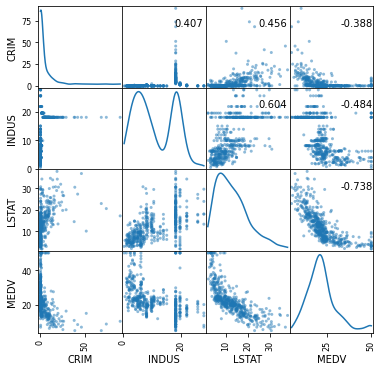

In [150]:
df = housing_df[['CRIM','INDUS','LSTAT','MEDV']]
axes = scatter_matrix(df, alpha = 0.5, figsize = (6,6), diagonal='kde')
# scatter_matrix(dataframe, 투명도, 캔버스사이즈, 대각선 plot 종류) / diagonal='kde' : 대각선에 각 단일변수의 빈도분포도를 넣음
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)): # Return the indices(인덱스) for the upper-triangle of 행렬.
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction',ha='center',va='center')
    #'axes fraction'은 좌표 축을 기준으로 출력
plt.show()

zip( ) 설명 : https://www.daleseo.com/python-zip/

np.triu_incides_from(axes, k=1) 설명 : https://numpy.org/doc/stable/reference/generated/numpy.triu_indices.html#numpy.triu_indices

## code for creating Figure 3.8

rcParams 설명 :  https://jrc-park.tistory.com/274

In [151]:
# Avoid the use of scientific notation (과학적 기수법) for the log axis

plt.rcParams['axes.formatter.min_exponent'] = 4 # axes.형식자.최소_지수 (ㅁㅓ래시발... ❓❓❓❓❓❓❓❓❓❓)

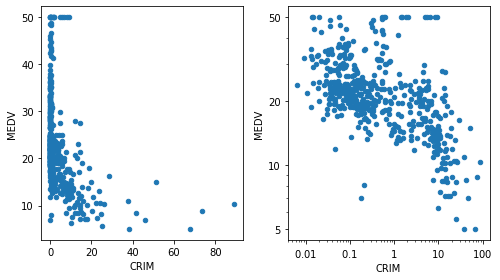

In [158]:
## scatter plot : regular and log scale

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(7,4))

# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])

# log scale
ax = housing_df.plot.scatter(x='CRIM',y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5,10,20,50])
ax.set_yticklabels([5,10,20,50])
plt.tight_layout(); plt.show()

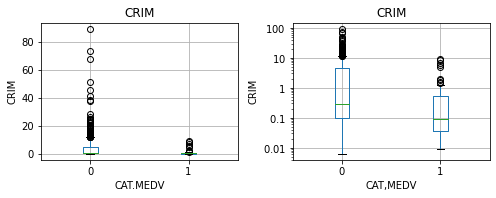

In [165]:
## boxplot : regular and log scale

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# regular size
ax = housing_df.boxplot(column = 'CRIM', by = 'CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column = 'CRIM', by = 'CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT,MEDV'); ax.set_ylabel('CRIM') 
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle(""); plt.tight_layout(); plt.show()

## code for creating Figure 3.9

np.polyfit/np.ploy1d 설명 : https://pinkwink.kr/1127 (다항식의 계수/함수를 알려줌)

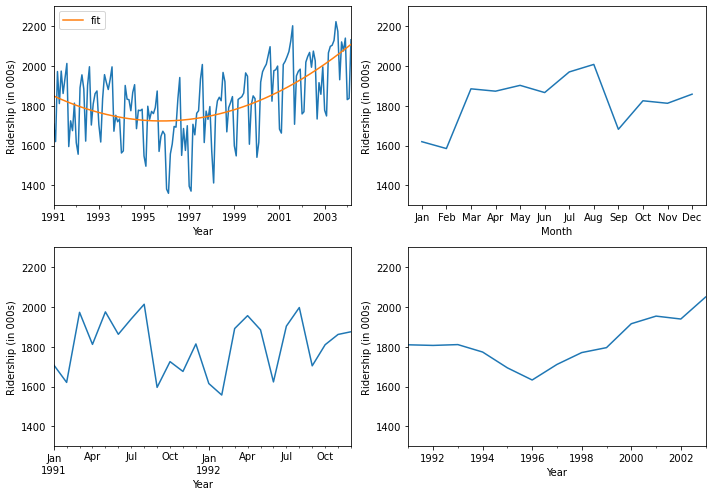

In [220]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7))
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)


## fit quadratic curve(이차곡선) and display

quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2)) 
# 세 번째 인자 : 찾고자 하는 함수의 차수 (2 -> 2차 함수)
# len(Amtrak_df) : Amtrak_df의 행 개수 -> range(len(Amtrak_df)) : 0,1,2,...,159
Amtrak_fit = pd.DataFrame({'fit':[quadraticFit(t) for t in range(len(Amtrak_df))]}) # 구한 poly함수 공역 집합 fit
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300,2300], legend=False, ax=axes[0][0]) # axes에 Amtrak_df 장전
Amtrak_fit.plot(ax=ax) # Amtrak_fit을 Amtrak_df 장전한 axes로 그림
ax.set_xlabel('Year') ; ax.set_ylabel('Ridership (in 000s)')


## Zoom in 2-year period 1/1/1991 to 12/1/1991

ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label


## Average by month

byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300,2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)')
yticks = [-2.0, -1.75, -1.5, -1.0, -0.75, -0.5, -0.25, 0.0]
ax.set_xticks(range(1,13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1,13)]);


## Avergae by year (exclude data from 2004)

byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean() # 년 단위로 group화
# groupby(pd.Grouper(freq='')
# : This will groupby the specified frequency if the target selection(via key or level) is a datetime-like object.
# freq = A,Y : year end frequency
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)')
plt.tight_layout()
plt.show()

윗 코드 자세히 보기

In [175]:
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2)) 
# len(Amtrak_df) : Amtrak_df의 행 개수 -> range(len(Amtrak_df)) : 0,1,2,...,159
# 세 번째 인자 : 찾고자 하는 함수의 차수 (2 -> 2차 함수)
quadraticFit 
# poly1d([x^2의 계수, x^1의 계수, 상수힝])

poly1d([ 3.80744462e-02, -4.37327650e+00,  1.84985327e+03])

In [182]:
Amtrak_fit = pd.DataFrame({'fit':[quadraticFit(t) for t in range(len(Amtrak_df))]}) # 구한 poly함수 공역 집합 fit
Amtrak_fit.index = Amtrak_df.index
Amtrak_fit

,fit
0,1849.853265
1,1845.518063
2,1841.259010
3,1837.076106
4,1832.969351
...,...
154,2079.342251
155,2086.733979
156,2094.201855
157,2101.745880


In [215]:
# pd.to_datetime 하면 

Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

print(Amtrak_df.index, '\n')
print(Amtrak_df.index.day, '\n')
print(Amtrak_df.index.month, '\n')
print(Amtrak_df.index.year)

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01',
               '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
               '2004-02-01', '2004-03-01'],
              dtype='datetime64[ns]', name='Month', length=159, freq=None) 

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Month', length=159) 

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3],
           dtype='int64', name='Month', length=159) 

Int64Index([1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
            ...
            2003, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004],
           dtype='int64', name='Month', le

## code for creating Figure 3.10

In [225]:
utilities_df = pd.read_csv('Universities.csv')
utilities_df.head(3)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0


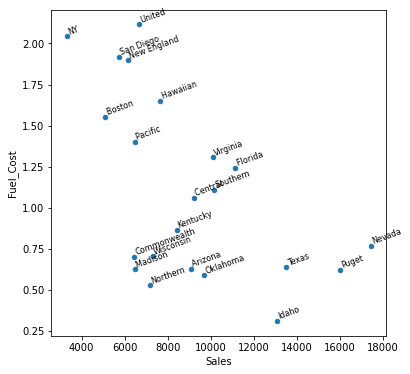

In [229]:
ax = utilities_df.plot.scatter(x='Sales', y ='Fuel_Cost', figsize=(6,6))
points = utilities_df[['Sales', 'Fuel_Cost','Company']]
_ = points.apply(lambda x:
                ax.text(*x, rotation=20, horizontalalignment='left',verticalalignment='bottom',fontsize=8), axis=1)

plt.show()

## code for creating Figure 3.11

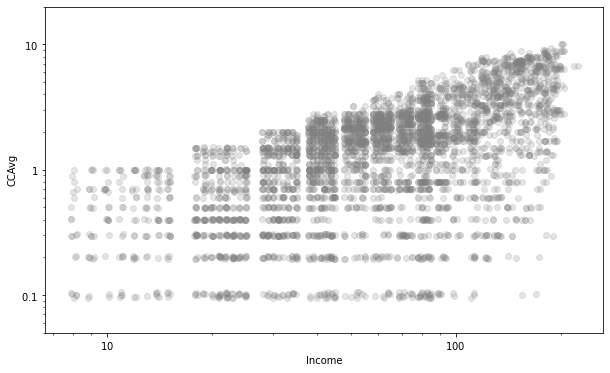

In [236]:
def jitter(x, factor=1):
    """ Add random jitter to x values"""
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d>0)
    a = factor * minDelta /5
    return x + np.random.uniform(-a, a, len(x))

universal_df = pd.read_csv('UniversalBank.csv')
saIdx = universal_df[universal_df['Securities Account'] == 1].index
plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
          jitter(universal_df.drop(saIdx).CCAvg),
          marker = 'o', color='grey',alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.show()

## code for creating Figure 3.12

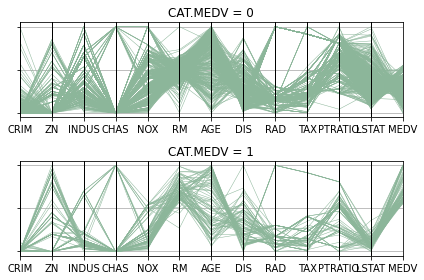

In [238]:
# Transform the axes, so that they all have the same range

min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns = housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1)
for i in (0,1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i], 'CAT_MEDV', ax=axes[i],linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()